# DISRUPTIVE ARCHITECTURES: IOT, IOB & GENERATIVA IA
# Checkpoint Parte 2 - Classificação e Regressão
## Integrantes:
- Breno Lemes Santiago RM: 552270
- Felipe Guedes Gonçalves RM: 550906
- Luiz Fellipe Soares de Sousa Lucena RM: 551365
- Nina Rebello Francisco RM: 99509
- Vitória Maria de Camargo RM: 552344

In [1]:
# Importar as bibliotecas necessárias
import pandas as pd
# https://pandas.pydata.org/
import numpy as np

import seaborn as sns
from sklearn import preprocessing

import matplotlib.pyplot as plt

# Pacotes para avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# Conversão de dados categóricos em numéricos
from sklearn.preprocessing import LabelEncoder
# https://scikit-learn.org/stable/modules/preprocessing.html

# Algoritmos de classificação
# KNN (K-Nearest Neighbors)
from sklearn.neighbors import KNeighborsClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Seleção de dados de treino e teste
from sklearn.model_selection import train_test_split
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# Obtenção da acurácia do modelo
from sklearn.metrics import accuracy_score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

# Exercício 1

# Telco Customer Churn

## Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

## Content
Each row represents a customer, and each column contains customer attributes described in the column Metadata.

The data set includes information about:

1. **Churn**: Customers who left within the last month.
2. **Services**: Services that each customer has signed up for, including phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
3. **Customer Account Information**: Details such as how long they've been a customer, contract type, payment method, paperless billing, monthly charges, and total charges.
4. **Demographic Information**: Gender, age range, and whether they have partners and dependents.

https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download


In [2]:
# Criar um Pandas Data Frame a partir do arquivo de dados csv
dados = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
dados

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# Quantos registros (linhas) e quantos atributos (colunas) tem o Data Frame?
dados.shape

print(f'O conjunto de dados tem {dados.shape[0]} linhas e {dados.shape[1]} colunas.')

O conjunto de dados tem 7043 linhas e 21 colunas.


In [6]:
# Visualizar as colunas
dados.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# Informações do formato de dados das colunas
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Estatísticas descritivas das colunas numéricas
dados.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
dados.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
# Removendo coluna customerID e dados vazios
dados.dropna(inplace=True)
dados.drop("customerID",axis="columns",inplace=True)

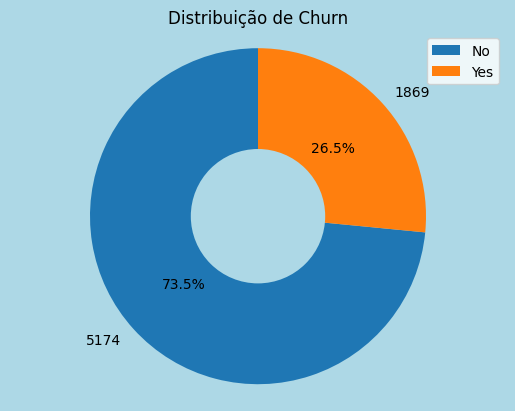

In [14]:
# Analisando distribuição de Churn (Whether the customer churned or not (Yes or No))

fig, ax = plt.subplots(facecolor="lightblue")
d = dados["Churn"].value_counts()
ax.pie(d,autopct='%1.1f%%', startangle=90,labels=d.values)
ax.legend(d.index)
ax.set_title("Distribuição de Churn")
centre_circle = plt.Circle((0,0),0.4,fc='lightblue')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal');

[Text(0.5, 0, 'Count')]

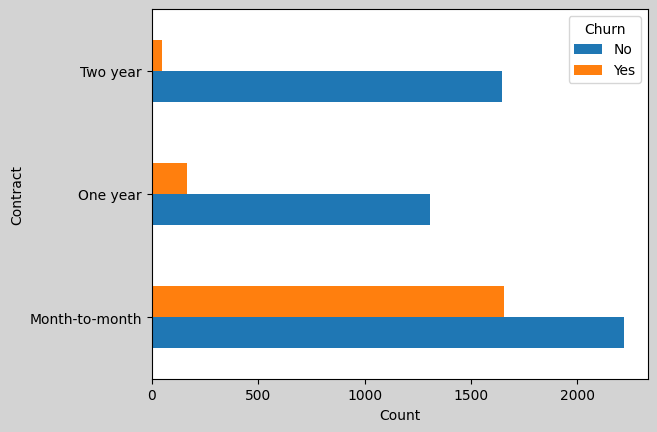

In [23]:
# Analisando a relação entre Churn e Contract

fig , ax = plt.subplots(facecolor="lightgray")
pd.crosstab(dados["Contract"],dados["Churn"]).plot(kind="barh",ax=ax)
ax.set(xlabel="Count")

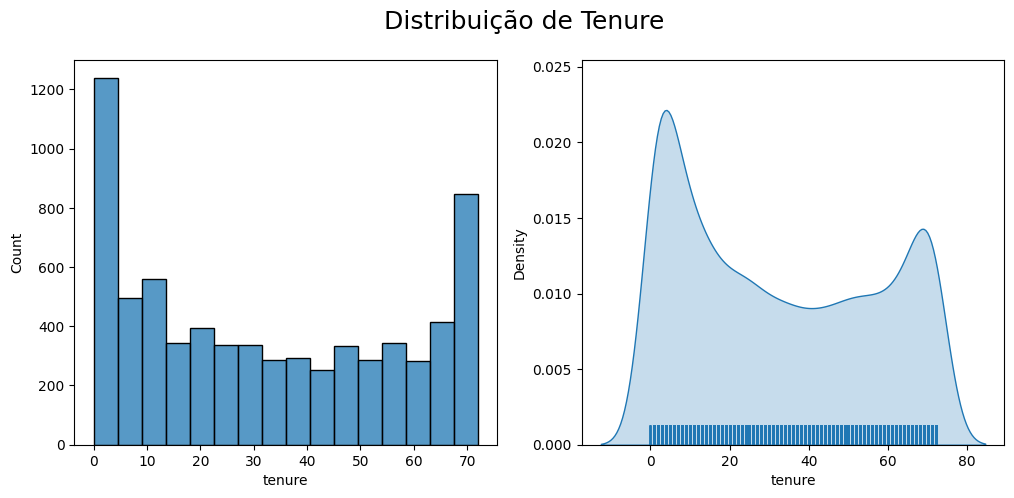

In [15]:
# Analisando a distribuição de Tenure (Number of months the customer has stayed with the company)

fig , ax = plt.subplots(1,2,figsize=(12,5))
sns.histplot(dados["tenure"],ax=ax[0])
sns.kdeplot(dados["tenure"],fill=True,ax=ax[1])
sns.rugplot(dados["tenure"],height=0.05)

fig.suptitle("Distribuição de Tenure",size=18);

In [17]:
print(dados["TotalCharges"].dtype)

object


In [20]:
dados["TotalCharges"] = (pd.to_numeric(dados["TotalCharges"],errors="coerce"))
dados.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Text(0.5, 0.98, 'Distribuição de TotalCharges')

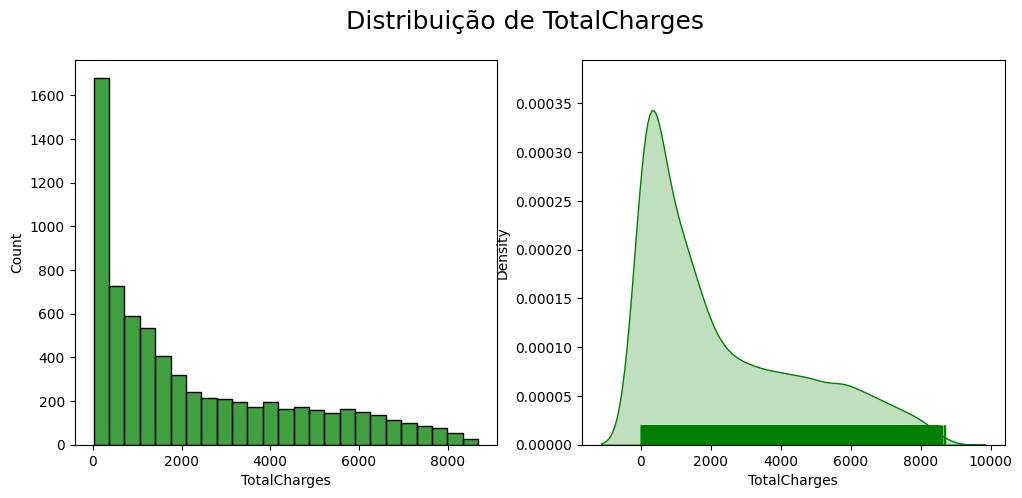

In [21]:
# Distribuição de TotalCharge (The total amount charged to the customer)

fig , ax = plt.subplots(1,2,figsize=(12,5))
sns.histplot(dados["TotalCharges"],ax=ax[0],color='Green')
sns.kdeplot(dados["TotalCharges"],fill=True,ax=ax[1],color='Green')
sns.rugplot(dados["TotalCharges"],height=0.05,color='Green')

fig.suptitle("Distribuição de TotalCharges",size=18)

Text(0.5, 0.98, 'Distribuição de MonthlyCharges')

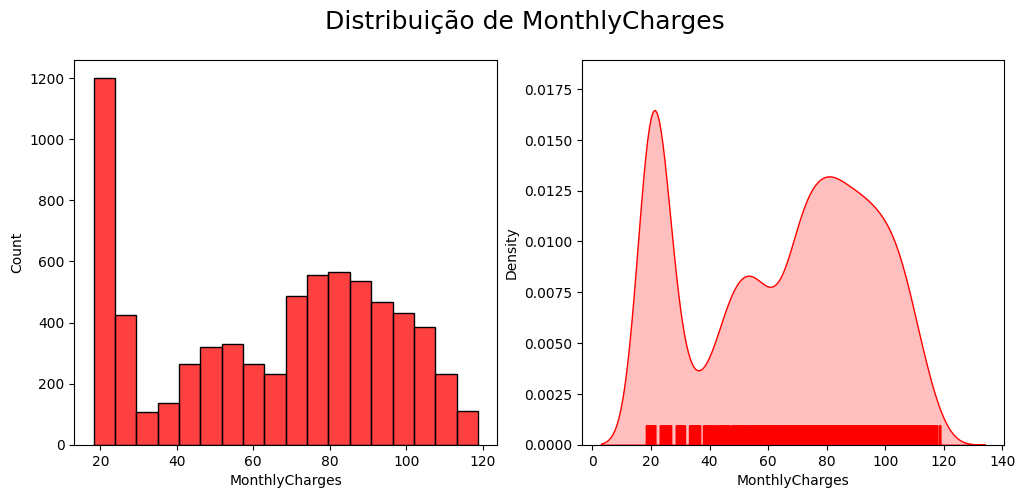

In [22]:
# Analisando MonthlyCharges (The amount charged to the customer monthly)

fig , ax = plt.subplots(1,2,figsize=(12,5))
sns.histplot(dados["MonthlyCharges"],ax=ax[0],color='Red')
sns.kdeplot(dados["MonthlyCharges"],fill=True,ax=ax[1],color='Red')
sns.rugplot(dados["MonthlyCharges"],height=0.05,color='Red')

fig.suptitle("Distribuição de MonthlyCharges",size=18)

In [24]:
dados.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:
# Separando dados novos
dados_novo = dados.iloc[:,[4,14,17,18,19]]
dados_novo

,tenure,Contract,MonthlyCharges,TotalCharges,Churn
0,1,Month-to-month,29.85,29.85,No
1,34,One year,56.95,1889.50,No
2,2,Month-to-month,53.85,108.15,Yes
3,45,One year,42.30,1840.75,No
4,2,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...
7038,24,One year,84.80,1990.50,No
7039,72,One year,103.20,7362.90,No
7040,11,Month-to-month,29.60,346.45,No
7041,4,Month-to-month,74.40,306.60,Yes


In [30]:
# Conversão de uma coluna de valores categóricos para numéricos
# Label Encoding
le = LabelEncoder()

In [35]:
dados_novo['Contract'] = le.fit_transform(dados_novo['Contract'])
dados_novo['Contract'].values

<ipython-input-35-79d2559047e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_novo['Contract'] = le.fit_transform(dados_novo['Contract'])


array([0, 1, 0, ..., 0, 0, 2])

In [36]:
dados_novo['Churn'] = le.fit_transform(dados_novo['Churn'])
dados_novo['Churn'].values

<ipython-input-36-6ea2ff65fa81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_novo['Churn'] = le.fit_transform(dados_novo['Churn'])


array([0, 0, 1, ..., 0, 1, 0])

In [37]:
dados_novo

,tenure,Contract,MonthlyCharges,TotalCharges,Churn
0,1,0,29.85,29.85,0
1,34,1,56.95,1889.50,0
2,2,0,53.85,108.15,1
3,45,1,42.30,1840.75,0
4,2,0,70.70,151.65,1
...,...,...,...,...,...
7038,24,1,84.80,1990.50,0
7039,72,1,103.20,7362.90,0
7040,11,0,29.60,346.45,0
7041,4,0,74.40,306.60,1


## GRÁFICOS DE DISPERSÃO, BOXPLOTS E HISTOGRAMAS

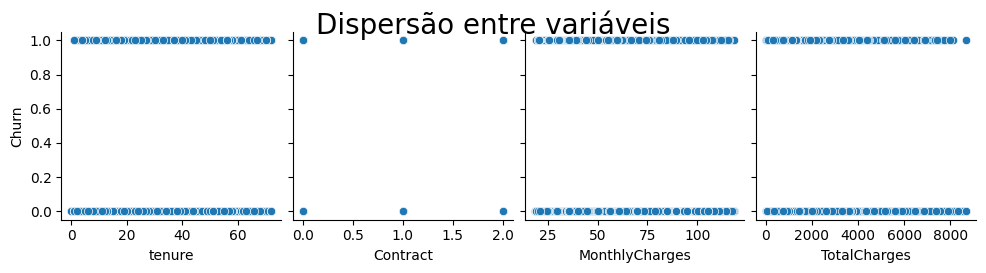

In [38]:
# gráfico de dispersão

ax = sns.pairplot(dados_novo, y_vars='Churn', x_vars=['tenure','Contract', 'MonthlyCharges', 'TotalCharges'])
ax.fig.suptitle('Dispersão entre variáveis', fontsize=20, y=1.05)
ax

<Axes: >

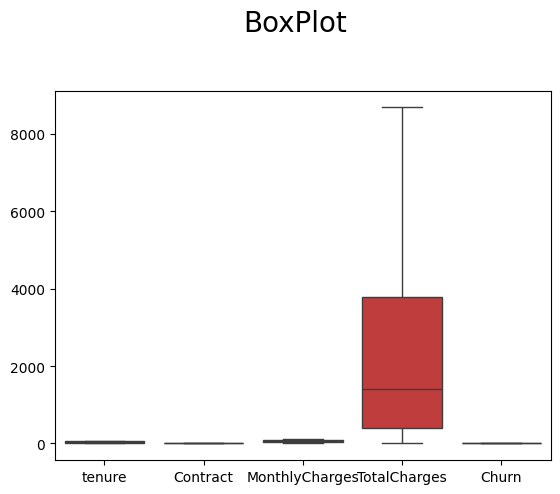

In [40]:
# boxplot

bp = sns.boxplot(dados_novo)
plt.suptitle('BoxPlot', fontsize=20, y=1.05)
bp

## Matriz de Correlação entre variáveis

In [41]:
# matriz de correlação
dados_novo.corr().round(4)

,tenure,Contract,MonthlyCharges,TotalCharges,Churn
tenure,1.0000,0.6716,0.2479,0.8259,-0.3522
Contract,0.6716,1.0000,-0.0742,0.4503,-0.3967
MonthlyCharges,0.2479,-0.0742,1.0000,0.6511,0.1934
TotalCharges,0.8259,0.4503,0.6511,1.0000,-0.1995
Churn,-0.3522,-0.3967,0.1934,-0.1995,1.0000


## Separando os dados em features (X) and labels (y)

In [44]:
# Separação dos dados de entrada e dados de saída
# X maiúsculo ----> Dados de entrada / Features / Variáveis independentes
# y minúsculo ----> Dados de saída / Target (alvo) / Variável dependente
# dados.iloc[linhas, colunas]
X = dados_novo.iloc[:, 0:4] # Todas as linhas e as colunas de 6, 7, 9
X.head()

,tenure,Contract,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,1,56.95,1889.50
2,2,0,53.85,108.15
3,45,1,42.30,1840.75
4,2,0,70.70,151.65


In [42]:
# Dados de saída
y = dados_novo['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

## Separando dados para treinamento e testes

In [58]:
dados_novo["TotalCharges"].fillna(dados_novo["TotalCharges"].mean(), inplace=True)

<ipython-input-58-f6283f064de7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_novo["TotalCharges"].fillna(dados_novo["TotalCharges"].mean(), inplace=True)


In [59]:
# Separação em dados de treino e dados de teste
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# SEED
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [60]:
X_train.shape

(4930, 4)

In [61]:
X_test.shape

(2113, 4)

In [62]:

df_X_train = pd.DataFrame(X_train)
df_X_train.isnull().sum()

tenure            0
Contract          0
MonthlyCharges    0
TotalCharges      9
dtype: int64

## Treinando os modelos (método fit)

In [55]:
label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

In [56]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Testando os modelos (método predict)

In [ ]:
KNN_prediction = KNN_model.predict(X_test)

In [ ]:
KNN_prediction

## Mostrando os resultados

In [ ]:
acuracia_knn = (accuracy_score(KNN_prediction, y_test)*100)

In [ ]:
print(f'Acurácia do modelo KNN: {acuracia_knn: .2f} %')